# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
election = pd.read_excel('Election_Data.xlsx',sheet_name=1,usecols="B:J")

In [3]:
#pulling first 5 records
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [4]:
# renaming some column names
election.rename(columns={'economic.cond.national': 'economic_cond_national', 'economic.cond.household': 'economic_cond_household','political.knowledge':'political_knowledge'}, inplace=True)
election.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
# info of the dataset
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
#shape of the data
election.shape

(1525, 9)

In [7]:
# checking null values
election.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

In [8]:
# checking duplicates
election.duplicated().sum()

8

In [9]:
# Descriptive statistics
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [10]:
election.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(f'skewness of the numeric field is :{election.age.skew()}')

skewness of the numeric field is :0.14462077228942483


Inferences:
<br>1- Dataset has 1525 rows and 9 columns
<br>2 columns are object datatype and 7 are integer
<br>3- Out of these 7 integer columns, only age is true integer and rest 6 are actually categorical
<br>4- There are no missing values
<br>5- There are 8 duplicated values but they can be different records as we don't have any unique identifier in the dataset. We will keep them all.
<br>6- age variable is very slightly right skewed

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Univariate analysis

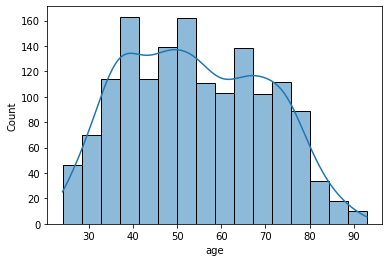

In [12]:
sns.histplot(election['age'],kde=True);

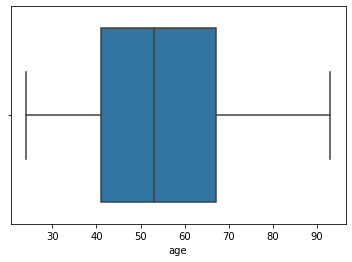

In [13]:
sns.boxplot(election['age']);

In [14]:
obj_list = ['vote','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender']

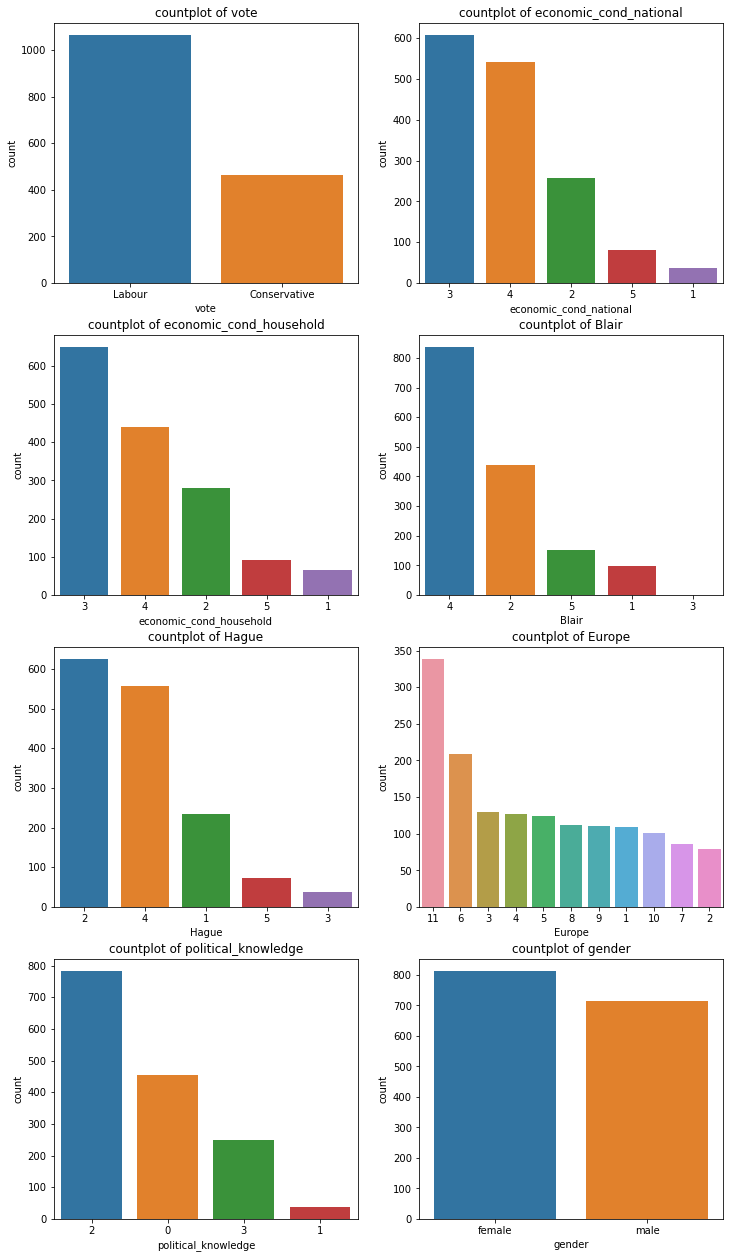

In [15]:
plt.figure(figsize=(12,22))
for i in range (len(obj_list)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=election[obj_list[i]],order=election[obj_list[i]].value_counts().index);
    plt.title(f'countplot of {obj_list[i]}')
    #plt.tight_layout

In [16]:
for i in obj_list:
    print(f'count of {i} is:')
    print(election[i].value_counts())
    print('__________________________')

count of vote is:
Labour          1063
Conservative     462
Name: vote, dtype: int64
__________________________
count of economic_cond_national is:
3    607
4    542
2    257
5     82
1     37
Name: economic_cond_national, dtype: int64
__________________________
count of economic_cond_household is:
3    648
4    440
2    280
5     92
1     65
Name: economic_cond_household, dtype: int64
__________________________
count of Blair is:
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64
__________________________
count of Hague is:
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64
__________________________
count of Europe is:
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64
__________________________
count of political_knowledge is:
2    782
0    455
3    250
1     38
Name: political_knowledge, dtype: int64
__________________________
count of gender is:
female    

### Bivariate analysis

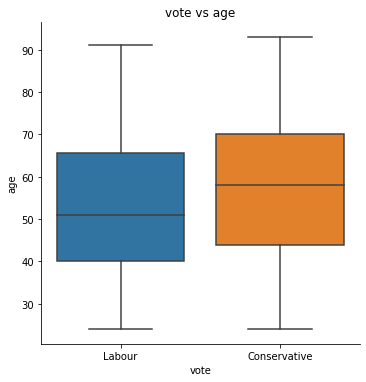

In [17]:
sns.catplot(data=election,x='vote',y='age',kind='box');
plt.title('vote vs age');

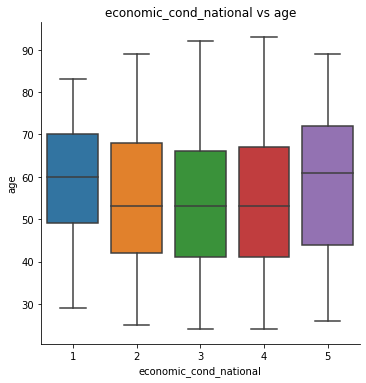

In [18]:
sns.catplot(data=election,x='economic_cond_national',y='age',kind='box');
plt.title('economic_cond_national vs age');

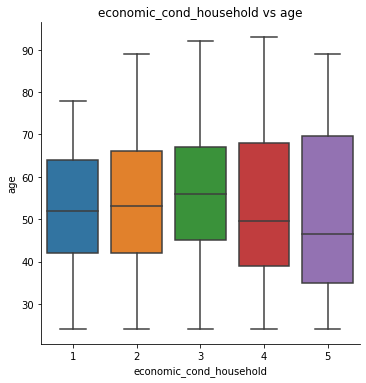

In [19]:
sns.catplot(data=election,x='economic_cond_household',y='age',kind='box');
plt.title('economic_cond_household vs age');

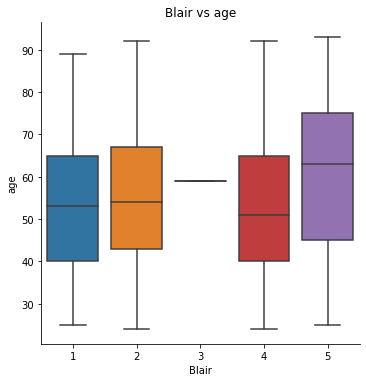

In [20]:
sns.catplot(data=election,x='Blair',y='age',kind='box');
plt.title('Blair vs age');

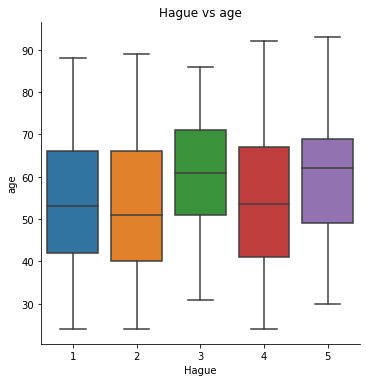

In [21]:
sns.catplot(data=election,x='Hague',y='age',kind='box');
plt.title('Hague vs age');

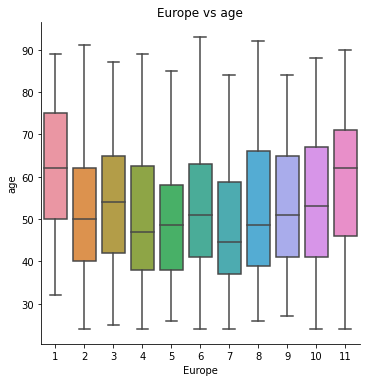

In [22]:
sns.catplot(data=election,x='Europe',y='age',kind='box');
plt.title('Europe vs age');

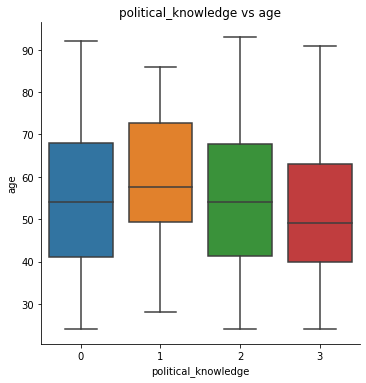

In [23]:
sns.catplot(data=election,x='political_knowledge',y='age',kind='box');
plt.title('political_knowledge vs age');

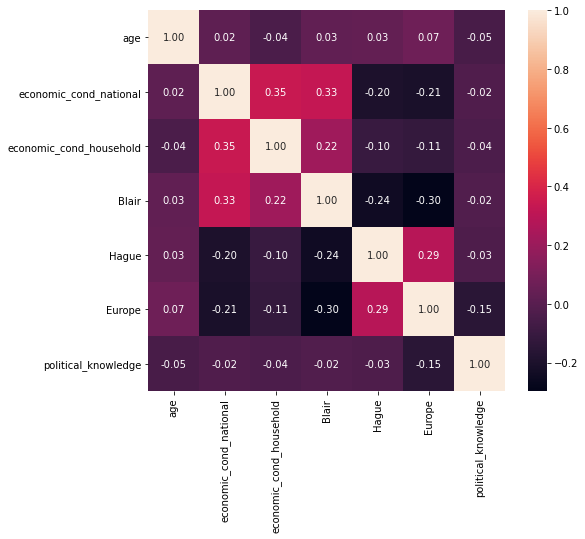

In [24]:
plt.figure(figsize=(8,7));
sns.heatmap(election.corr(),annot=True,fmt='.2f');

In [25]:
pd.crosstab(election['vote'],election['gender'],margins=True)

gender,female,male,All
vote,,,
Conservative,259,203,462
Labour,553,510,1063
All,812,713,1525


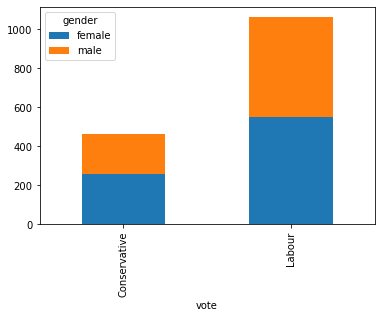

In [26]:
pd.crosstab(election['vote'],election['gender']).plot(kind='bar',stacked=True);

In [27]:
pd.crosstab(election['vote'],election['economic_cond_national'],margins=True)

economic_cond_national,1,2,3,4,5,All
vote,,,,,,
Conservative,21,140,200,92,9,462
Labour,16,117,407,450,73,1063
All,37,257,607,542,82,1525


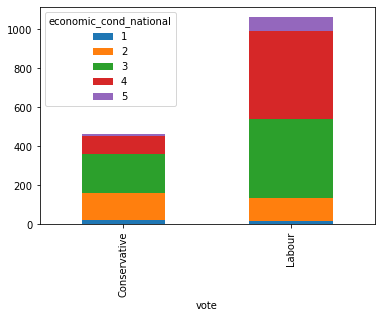

In [28]:
pd.crosstab(election['vote'],election['economic_cond_national']).plot(kind='bar',stacked=True);

In [29]:
pd.crosstab(election['vote'],election['economic_cond_household'],margins=True)

economic_cond_household,1,2,3,4,5,All
vote,,,,,,
Conservative,28,126,198,87,23,462
Labour,37,154,450,353,69,1063
All,65,280,648,440,92,1525


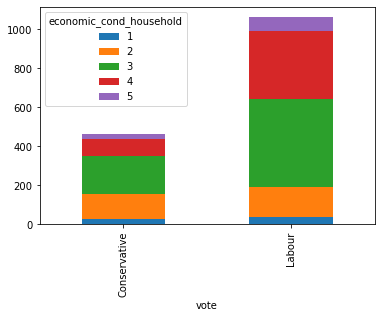

In [30]:
pd.crosstab(election['vote'],election['economic_cond_household']).plot(kind='bar',stacked=True);

In [31]:
pd.crosstab(election['vote'],election['Blair'],margins=True)

Blair,1,2,3,4,5,All
vote,,,,,,
Conservative,59,242,1,157,3,462
Labour,38,196,0,679,150,1063
All,97,438,1,836,153,1525


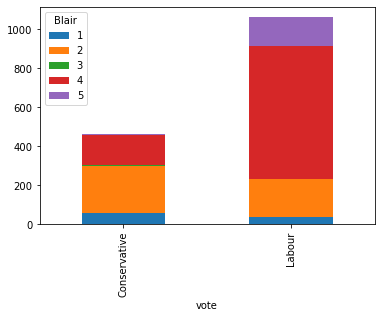

In [32]:
pd.crosstab(election['vote'],election['Blair']).plot(kind='bar',stacked=True);

In [33]:
pd.crosstab(election['vote'],election['Hague'],margins=True)

Hague,1,2,3,4,5,All
vote,,,,,,
Conservative,11,96,9,287,59,462
Labour,222,528,28,271,14,1063
All,233,624,37,558,73,1525


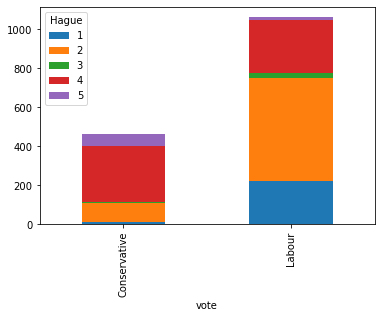

In [34]:
pd.crosstab(election['vote'],election['Hague']).plot(kind='bar',stacked=True);

In [35]:
pd.crosstab(election['vote'],election['Europe'],margins=True)

Europe,1,2,3,4,5,6,7,8,9,10,11,All
vote,,,,,,,,,,,,
Conservative,5,6,14,18,20,36,32,49,56,54,172,462
Labour,104,73,115,109,104,173,54,63,55,47,166,1063
All,109,79,129,127,124,209,86,112,111,101,338,1525


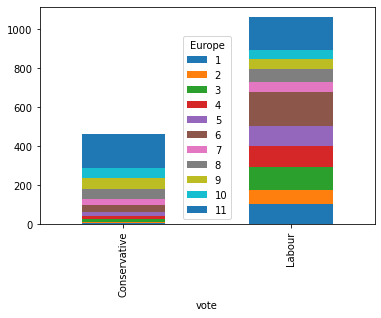

In [36]:
pd.crosstab(election['vote'],election['Europe']).plot(kind='bar',stacked=True);

In [37]:
pd.crosstab(election['vote'],election['political_knowledge'],margins=True)

political_knowledge,0,1,2,3,All
vote,,,,,
Conservative,95,11,284,72,462
Labour,360,27,498,178,1063
All,455,38,782,250,1525


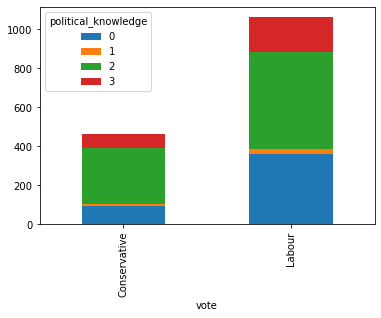

In [38]:
pd.crosstab(election['vote'],election['political_knowledge']).plot(kind='bar',stacked=True);

#### Inferences:
<br>1- Median age of the voters of "Labour" party is close to 50 while median age of the voters of "Conservative" party is close to 60 which means more young people are the supporters of "Labour" party.
<br>2- Median age of people having 'economic_cond_national' as 1 and 5 is in age 60s while for the people having 'economic_cond_national' as 2 ,3 and 4 is in age 50s.
<br>3- There is not much age variance for 'economic_cond_household'. 
<br>4- For Blair 5, the average of voters are in 60s but for rest of them, in 50s.
<br>5- Hague 3 and 5 are closer to each other in terms of average age (60s) while rest 1,2 and 4 are close to 50s.
<br>6- Eurosceptic sentiment does not seem to be influced by age of the voter.
<br>7- Average age seems to be between 50 to 60 for all different political_knowledge
<br>8- There is no significance co-relation in any of the variables
<br>9- For both the parties, majority of the voters were female voters
<br>10- For both Conservative and Labour parties, voters with current national economic condition 3 have the maximum contribution while 1 has minimum contribution.
<br>11- For Conservative voters, more than 50% voters belong to Blair 2 while for Labour party, more than 50% voters belong to Blair 4.
<br>12 - For Conservative voters, more than 50% voters belong to Hague 4 while for Labour party, around 50% voters belong to Hague 2. For Conservative voters, minimum contribution is from voters who belong to Hague 3 while for Labour party Hague 5 voters contributed the least.
<br> 13- Maximum voters for both parties have Knowledge of scale 2 on parties positions on European integration.

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

#### Data Encoding

In [39]:
# Encoding the object variable
election['vote'] = pd.Categorical(election['vote']).codes

In [40]:
election['gender'] = pd.Categorical(election['gender']).codes

Only age is a true continuous variable here. Apart from the age, rest of the variables are although integer datatype but they are not continuous. Rest all are categorical in nature. 
We have already converted vote and gender into category codes.
ALl the categorical variables like economic_cond_national, economic_cond_household, Blair, Hague, Europe, political_knowledge are ordinal and the values given have a order so we don't need to change them.

Scaling is not necessary here. We will scale the data only for the KNN.

In [41]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic_cond_national   1525 non-null   int64
 3   economic_cond_household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political_knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


In [42]:
election.vote = election.vote.astype('category')

In [43]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic_cond_national   1525 non-null   int64   
 3   economic_cond_household  1525 non-null   int64   
 4   Blair                    1525 non-null   int64   
 5   Hague                    1525 non-null   int64   
 6   Europe                   1525 non-null   int64   
 7   political_knowledge      1525 non-null   int64   
 8   gender                   1525 non-null   int8    
dtypes: category(1), int64(7), int8(1)
memory usage: 86.6 KB


#### Split the data into train and test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = election.drop('vote',axis=1)
y = election['vote']

In [46]:
y.value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, stratify=election['vote'])

In [48]:
y_train.value_counts(normalize=True)

1    0.697282
0    0.302718
Name: vote, dtype: float64

In [49]:
y_test.value_counts(normalize=True)

1    0.696507
0    0.303493
Name: vote, dtype: float64

We have splitted the data into training and test set based on 70:30 ratio. We made sure to give stratify input so that the data is splitted and maintain the dependent variable values original ratio.

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
Log_classifier = LogisticRegression(max_iter=101, random_state=1)

In [52]:
Log_classifier.fit(X_train,y_train)

LogisticRegression(max_iter=101, random_state=1)

In [53]:
y_pred_train_log = Log_classifier.predict(X_train)
y_pred_test_log = Log_classifier.predict(X_test)

In [54]:
#accuracy score of training data
Log_train_acc = Log_classifier.score(X_train,y_train)
Log_train_acc

0.8284910965323337

In [55]:
#accuracy score of test data
Log_test_acc = Log_classifier.score(X_test,y_test)
Log_test_acc

0.8493449781659389

In [56]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, recall_score, precision_score, roc_auc_score

In [57]:
# training set classification report
print(classification_report(y_train, y_pred_train_log))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



In [58]:
# test set classification report
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



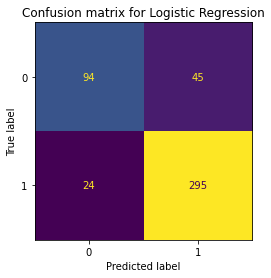

In [59]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=Log_classifier,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Logistic Regression');

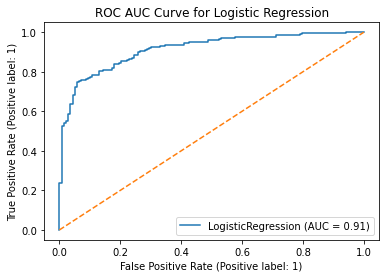

In [60]:
# roc_auc_curve of test data
plot_roc_curve(estimator=Log_classifier,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Logistic Regression');

In [61]:
Log_recall_1 = round(recall_score(y_test,y_pred_test_log),2)

In [62]:
Log_recall_0 = round(recall_score(y_test,y_pred_test_log,pos_label=0),2)

In [63]:
Log_pre_1 = round(precision_score(y_test,y_pred_test_log),2)

In [64]:
Log_pre_0 = round(precision_score(y_test,y_pred_test_log,pos_label=0),2)

In [65]:
Log_classifier.coef_

array([[-0.01872719,  0.34960601,  0.0860169 ,  0.53271867, -0.84863953,
        -0.2067135 , -0.37173275,  0.19467236]])

### Logistic Regression using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
sm = SMOTE(random_state=1)

In [68]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [69]:
y_train.value_counts()

1    744
0    323
Name: vote, dtype: int64

In [70]:
y_train_res.value_counts()

0    744
1    744
Name: vote, dtype: int64

In [71]:
Log_classifier_SM = LogisticRegression(max_iter=101, random_state=1)

In [72]:
Log_classifier_SM.fit(X_train_res,y_train_res)

LogisticRegression(max_iter=101, random_state=1)

In [73]:
Log_classifier_SM.score(X_train_res,y_train_res)

0.8252688172043011

In [74]:
Log_classifier_SM.score(X_test,y_test)

0.8406113537117904

In [75]:
y_pred_res_train_log = Log_classifier.predict(X_train_res)
y_pred_res_test_log = Log_classifier.predict(X_test)

In [76]:
# test set classification report
print(classification_report(y_test, y_pred_res_test_log))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



There is no change in the performance after using SMOTE

### Linear DIscrement Analysis

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
clf = LinearDiscriminantAnalysis()
LDA_classifier = clf.fit(X_train,y_train)

In [79]:
y_pred_train_lda = Log_classifier.predict(X_train)
y_pred_test_lda = Log_classifier.predict(X_test)

In [80]:
# accuracy score of training data
LDA_classifier.score(X_train,y_train)

0.8256794751640113

In [81]:
# accuracy score of test data
LDA_classifier.score(X_test,y_test)

0.8449781659388647

In [82]:
# training set classification report
print(classification_report(y_train, y_pred_train_lda))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



In [83]:
# test set classification report
print(classification_report(y_test, y_pred_test_lda))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



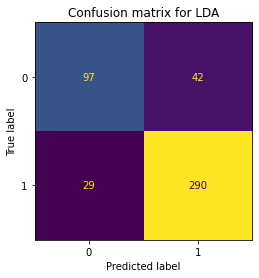

In [84]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=LDA_classifier,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for LDA');

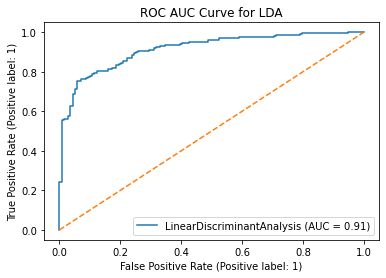

In [85]:
# roc_auc_curve of test data
plot_roc_curve(estimator=LDA_classifier,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for LDA');

In [86]:
LDA_recall_1 = round(recall_score(y_test,y_pred_test_lda),2)
LDA_recall_0 = round(recall_score(y_test,y_pred_test_lda,pos_label=0),2)
LDA_pre_1 = round(precision_score(y_test,y_pred_test_lda),2)
LDA_pre_0 = round(precision_score(y_test,y_pred_test_lda,pos_label=0),2)

In [87]:
# Alternative (better way ) of getting the discriminant scores of each observation
disc_scores = (LDA_classifier.coef_*X_train).sum(axis=1) # beta* respective x values for each observation

In [88]:
# sample discriminant scores
disc_scores[:10]

1493   -1.261952
1431   -2.413730
235    -0.895436
1078   -1.118715
735    -0.069050
711    -3.507388
801     0.640763
912    -0.338112
1427    1.598648
1066   -4.888703
dtype: float64

### Linear DIscriminant Analysis using SMOTE

In [89]:
clf = LinearDiscriminantAnalysis()
LDA_classifier = clf.fit(X_train_res,y_train_res)

In [90]:
y_pred_res_train_lda = Log_classifier.predict(X_train_res)
y_pred_res_test_lda = Log_classifier.predict(X_test)

In [91]:
LDA_classifier.score(X_train_res,y_train_res)

0.8252688172043011

In [92]:
LDA_classifier.score(X_test,y_test)

0.8362445414847162

In [93]:
# test set classification report
print(classification_report(y_test, y_pred_res_test_lda))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



Again in LDA, SMOTE is not making any improvement in LDA too.

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

### Naive Bayes Model

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
NB = GaussianNB()

In [96]:
NB.fit(X_train,y_train)

GaussianNB()

In [97]:
# Accuracy score of training data
NB.score(X_train,y_train)

0.8219306466729147

In [98]:
# Accuracy score of test data
NB.score(X_test,y_test)

0.8471615720524017

In [99]:
y_train_pred_NB = NB.predict(X_train)
y_test_pred_NB = NB.predict(X_test)

In [100]:
# training set classification report
print(classification_report(y_train, y_train_pred_NB))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       323
           1       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [101]:
# test set classification report
print(classification_report(y_test, y_test_pred_NB))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



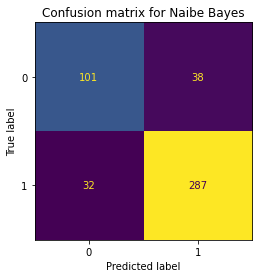

In [102]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=NB,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Naibe Bayes');

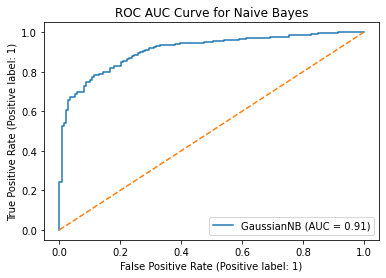

In [103]:
# roc_auc_curve of test data
plot_roc_curve(estimator=NB,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Naive Bayes');

In [104]:
NB_recall_1 = round(recall_score(y_test,y_test_pred_NB),2)
NB_recall_0 = round(recall_score(y_test,y_test_pred_NB,pos_label=0),2)
NB_pre_1 = round(precision_score(y_test,y_test_pred_NB),2)
NB_pre_0 = round(precision_score(y_test,y_test_pred_NB,pos_label=0),2)

### KNN Model

In [105]:
election2 = election.copy()

In [106]:
X = election.drop('vote',axis=1)
y = election['vote']

In [107]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, random_state=1, test_size=0.30, stratify=election2['vote'])

In [108]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainK = scaler.fit_transform(X_trainK)
X_testK = scaler.transform(X_testK)

In [109]:
X_trainK.mean(axis=0) # verify the column means are 0 post scaling

array([-2.11431414e-16,  0.00000000e+00,  2.36819832e-16,  1.23196257e-16,
       -1.33185143e-17,  1.28190700e-16,  1.03218486e-16,  1.74805500e-17])

In [110]:
X_trainK.std(axis=0) # verify that column std are all 1 post scaling

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [111]:
from sklearn.neighbors import KNeighborsClassifier

#### Best Value of K

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [112]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trainK, y_trainK)
    # evaluate test accuracy
    scores = knn.score(X_testK, y_testK)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.19213973799126638,
 0.15502183406113534,
 0.16812227074235808,
 0.16593886462882101,
 0.16157205240174677,
 0.1506550218340611,
 0.13973799126637554,
 0.14410480349344978,
 0.15283842794759828,
 0.15283842794759828]

#### Plot misclassification error vs k (with k value on X-axis) using matplotlib

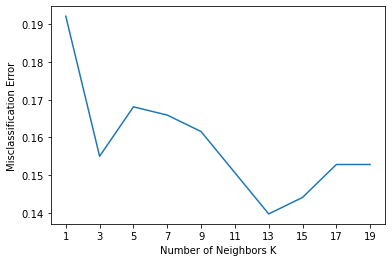

In [113]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.xticks(range(1,20,2));

For K = 13 it is giving the best test accuracy (lowest error), so lets check train and test performance for KNN model with K=13.

In [114]:
KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_trainK,y_trainK)

KNeighborsClassifier(n_neighbors=13)

In [115]:
## Performance Matrix on training data set
y_train_predict_KNN = KNN_model.predict(X_trainK)

In [116]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_testK)

In [117]:
# train set classification report
print(classification_report(y_trainK, y_train_predict_KNN))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       323
           1       0.87      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [118]:
# test set classification report
print(classification_report(y_testK, y_test_predict_KNN))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       139
           1       0.89      0.92      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458



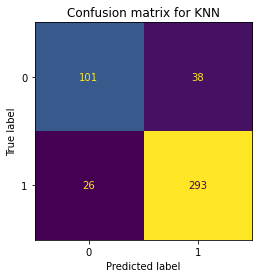

In [119]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=KNN_model,X=X_testK,y_true=y_testK,colorbar=False);
plt.title('Confusion matrix for KNN');

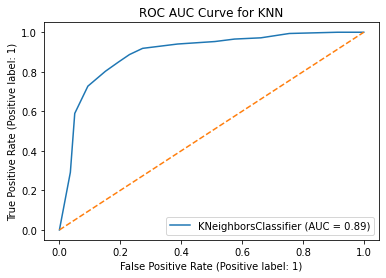

In [120]:
# roc_auc_curve of test data
plot_roc_curve(estimator=KNN_model,X=X_testK,y=y_testK);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for KNN');

In [121]:
KNN_recall_1 = round(recall_score(y_testK,y_test_predict_KNN),2)
KNN_recall_0 = round(recall_score(y_testK,y_test_predict_KNN,pos_label=0),2)
KNN_pre_1 = round(precision_score(y_testK,y_test_predict_KNN),2)
KNN_pre_0 = round(precision_score(y_testK,y_test_predict_KNN,pos_label=0),2)

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Logistic Regression using Grid Search CV

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.0001,0.00001, 0.1, 0.01,0.001],
     'l1_ratio':[0.25,0.5,0.75],
     'max_iter':[100,1000,10000]}

In [128]:
LR_G = LogisticRegression(random_state=1)

In [129]:
grid_search = GridSearchCV(estimator = LR_G, 
                           param_grid = grid, 
                           cv = 5,
                           n_jobs=-1,
                           scoring='precision')

In [130]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.0001, 1e-05, 0.1, 0.01, 0.001]},
             scoring='precision')

In [131]:
grid_search.best_params_

{'l1_ratio': 0.25,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.01}

In [132]:
best_model = LogisticRegression(max_iter=100,n_jobs=-1,random_state=1,
                               l1_ratio=0.25,penalty='l1',
                               solver='liblinear', tol=0.01)

In [133]:
best_model.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.25, n_jobs=-1, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.01)

In [134]:
# Prediction on the training set

ytrain_predict_lrg = best_model.predict(X_train)
ytest_predict_lrg = best_model.predict(X_test)

In [135]:
# train set classification report
print(classification_report(y_train, ytrain_predict_lrg))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.83      1067



In [136]:
# test set classification report
print(classification_report(y_test, ytest_predict_lrg))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       139
           1       0.87      0.93      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.81      0.82       458
weighted avg       0.85      0.86      0.85       458



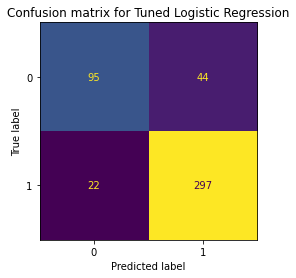

In [137]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=best_model,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Tuned Logistic Regression');

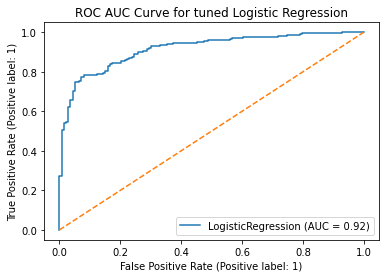

In [138]:
# roc_auc_curve of test data
plot_roc_curve(estimator=best_model,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for tuned Logistic Regression');

In [139]:
LRT_recall_1 = round(recall_score(y_test,ytest_predict_lrg),2)
LRT_recall_0 = round(recall_score(y_test,ytest_predict_lrg,pos_label=0),2)
LRT_pre_1 = round(precision_score(y_test,ytest_predict_lrg),2)
LRT_pre_0 = round(precision_score(y_test,ytest_predict_lrg,pos_label=0),2)

We will first build a fully grown decision tree and will apply the RandomForest after that using different hyper parameters

### Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [142]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [143]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, # tree model
                                out_file=ld_Tree_File, # file into which the tree flow to be written
                                feature_names = list(X_train), # names of features 
                                class_names = list(train_char_label)) # tgt feature labels

ld_Tree_File.close()

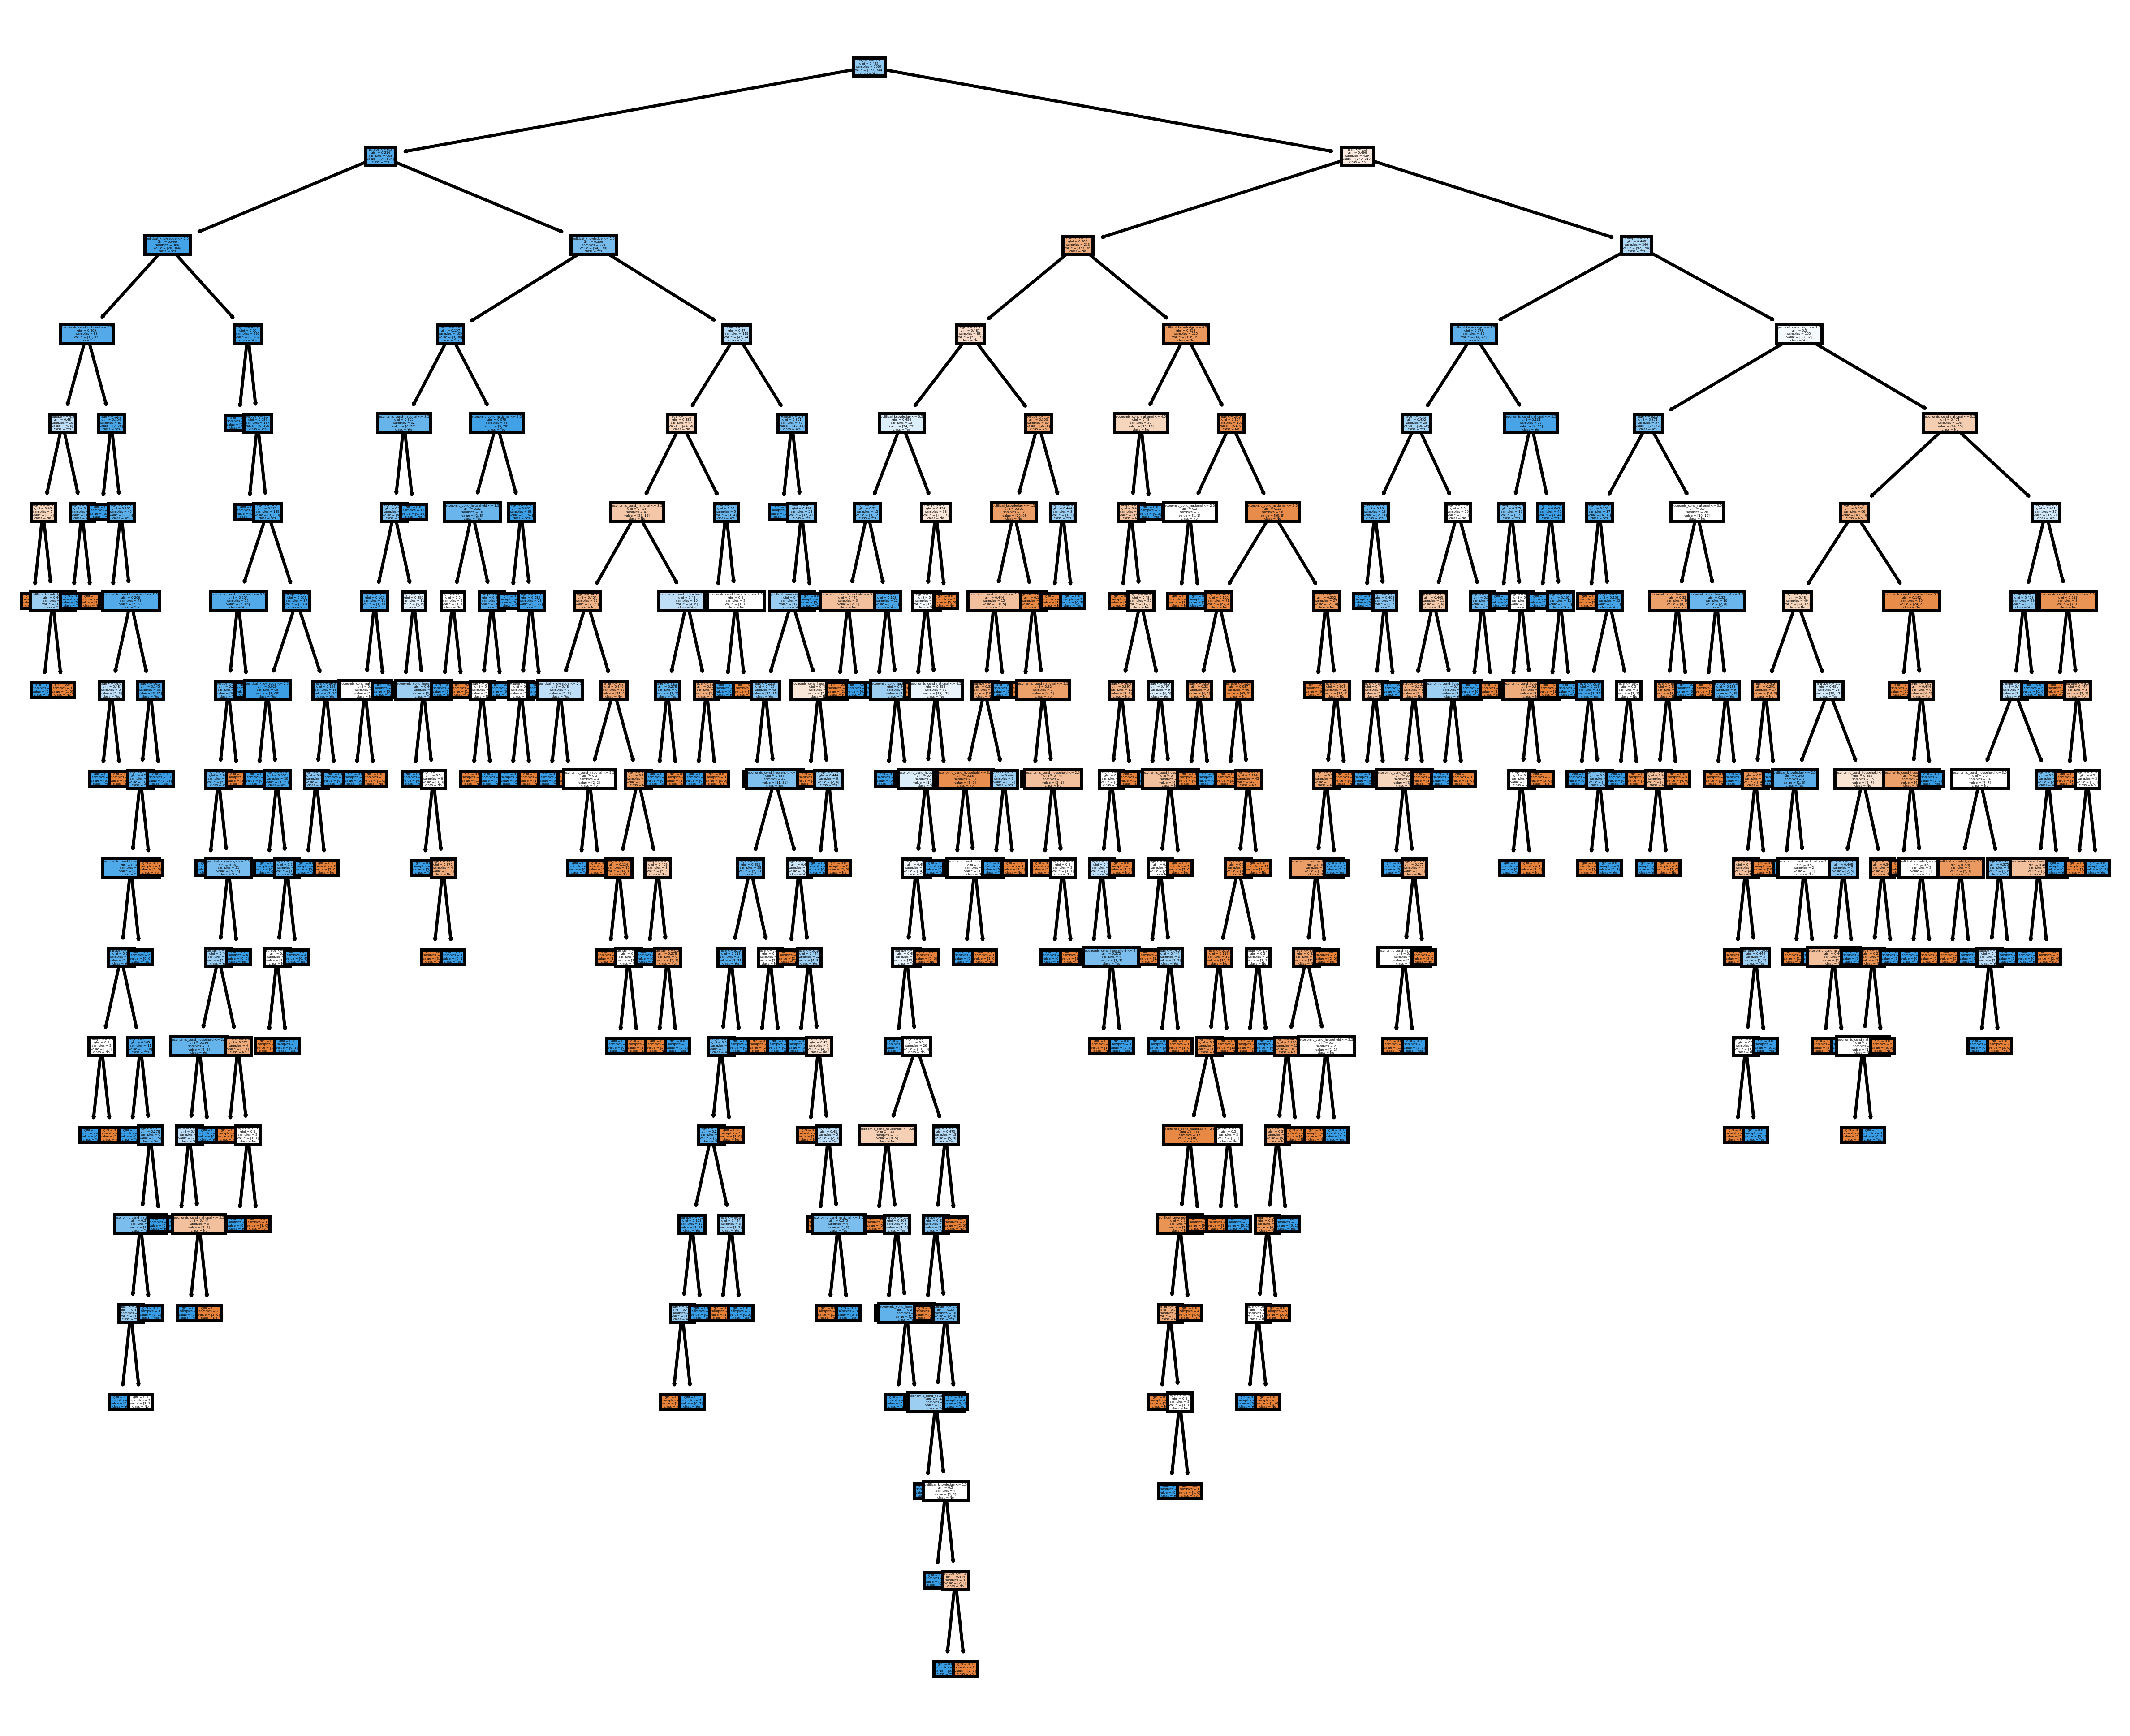

In [144]:
plt.figure(figsize=(12,10), dpi=500)
tree.plot_tree(dt_model,
              feature_names=list(X_train),
              class_names=list(train_char_label),
              filled=True);

Variable Importance

In [145]:
dt_model.feature_importances_

array([0.23984865, 0.06985314, 0.07840578, 0.10308801, 0.24036563,
       0.14503631, 0.09297953, 0.03042295])

In [146]:
pd.DataFrame(dt_model.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Hague,0.240366
age,0.239849
Europe,0.145036
Blair,0.103088
political_knowledge,0.092980
economic_cond_household,0.078406
economic_cond_national,0.069853
gender,0.030423


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1)

In [51]:
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [52]:
# trainjng set score
RF.score(X_train,y_train)

0.9990627928772259

In [53]:
# test set score
RF.score(X_test,y_test)

0.8493449781659389

This is an overfit model so we can't use it in production. We can try tuning the hyper parameters bu using the GridSearchCV

### Random Forest Classifier using GridSearch CV

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [165]:
grid = {
    'max_depth': [6,7,8,9],
    'max_features': [3,4,5,6,7],
    'min_samples_leaf': [5,8,10,15,20],
    'min_samples_split': [15,24,30,45,60],
    'n_estimators': [101, 151, 201],
}

In [166]:
rfc = RandomForestClassifier(random_state=1)

In [167]:
gridsearch = GridSearchCV(estimator = rfc, param_grid = grid, cv=5,n_jobs=-1)

In [168]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 8, 10, 15, 20],
                         'min_samples_split': [15, 24, 30, 45, 60],
                         'n_estimators': [101, 151, 201]})

In [169]:
gridsearch.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 101}

In [170]:
estimator = gridsearch.best_estimator_

In [171]:
estimator.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=10,
                       min_samples_split=15, n_estimators=101, random_state=1)

In [172]:
#accuracy score of training set
estimator.score(X_train,y_train)

0.865979381443299

In [173]:
#accuracy score of test set
estimator.score(X_test,y_test)

0.8471615720524017

In [174]:
RF_train_pred = estimator.predict(X_train)
RF_test_pred = estimator.predict(X_test)

In [175]:
# training set classification report
print(classification_report(y_train, RF_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.76       323
           1       0.88      0.93      0.91       744

    accuracy                           0.87      1067
   macro avg       0.85      0.82      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [176]:
# test set classification report
print(classification_report(y_test, RF_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       139
           1       0.87      0.92      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.84      0.85      0.84       458



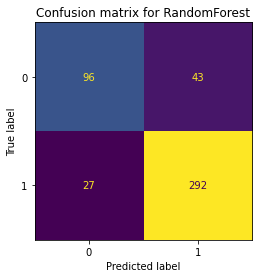

In [177]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=estimator,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for RandomForest');

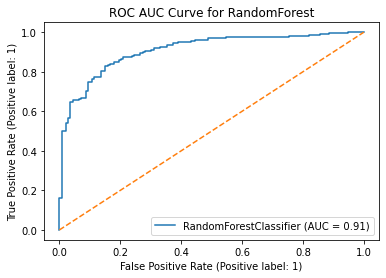

In [178]:
# roc_auc_curve of test data
plot_roc_curve(estimator=estimator,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for RandomForest');

In [179]:
RF_recall_1 = round(recall_score(y_test,RF_test_pred),2)
RF_recall_0 = round(recall_score(y_test,RF_test_pred,pos_label=0),2)
RF_pre_1 = round(precision_score(y_test,RF_test_pred),2)
RF_pre_0 = round(precision_score(y_test,RF_test_pred,pos_label=0),2)

In [180]:
pd.DataFrame(estimator.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Hague,0.349111
Europe,0.199481
Blair,0.153765
political_knowledge,0.104881
age,0.097943
economic_cond_national,0.057792
economic_cond_household,0.026218
gender,0.010809


### Linear Discrimenant Analysis using Grid Search CV

In [181]:
grid = {
    'solver': ['svd','lsqr', 'eigen'],
    'shrinkage': [None, 'auto'],
    'tol': [0.1,0.01,0.001,0.0001,0.00001]
}

In [182]:
LDA_T = LinearDiscriminantAnalysis()

In [183]:
gridsearch = GridSearchCV(estimator = LDA_T, param_grid = grid, cv=5,n_jobs=-1,scoring='precision')

In [184]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [None, 'auto'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='precision')

In [185]:
gridsearch.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1}

In [186]:
best_model = gridsearch.best_estimator_

In [187]:
best_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.1)

In [188]:
#accuracy score of training set
best_model.score(X_train,y_train)

0.8284910965323337

In [189]:
#accuracy score of test set
best_model.score(X_test,y_test)

0.851528384279476

In [190]:
LDAT_train_pred = best_model.predict(X_train)
LDAT_test_pred = best_model.predict(X_test)

In [191]:
# training set classification report
print(classification_report(y_train, LDAT_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [192]:
# test set classification report
print(classification_report(y_test, LDAT_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       139
           1       0.88      0.91      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



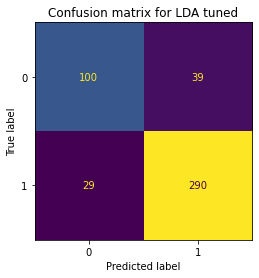

In [193]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=best_model,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for LDA tuned');

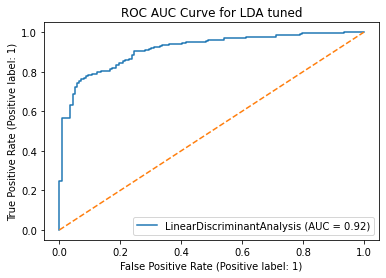

In [194]:
# roc_auc_curve of test data
plot_roc_curve(estimator=best_model,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for LDA tuned');

In [195]:
LDAT_recall_1 = round(recall_score(y_test,LDAT_test_pred),2)
LDAT_recall_0 = round(recall_score(y_test,LDAT_test_pred,pos_label=0),2)
LDAT_pre_1 = round(precision_score(y_test,LDAT_test_pred),2)
LDAT_pre_0 = round(precision_score(y_test,LDAT_test_pred,pos_label=0),2)

### KNN using GridSearch CV

In [196]:
grid = {
    'n_neighbors': (3,5,7,9,11,13,15),
    'leaf_size': (10,20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
    'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')
}

In [197]:
KNN_T = KNeighborsClassifier()

In [198]:
gridsearch = GridSearchCV(
    estimator=KNN_T,
    param_grid=grid,
    scoring = 'precision',
    n_jobs = -1,
    cv = 5
)

In [199]:
gridsearch.fit(X_trainK,y_trainK)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': (10, 20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (3, 5, 7, 9, 11, 13, 15), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='precision')

In [200]:
gridsearch.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [201]:
best_model = gridsearch.best_estimator_

In [202]:
best_model.fit(X_trainK,y_trainK)

KNeighborsClassifier(leaf_size=10, p=1)

In [203]:
KNNT_train_pred = best_model.predict(X_trainK)
KNNT_test_pred = best_model.predict(X_testK)

In [204]:
# training set classification report
print(classification_report(y_trainK, KNNT_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       323
           1       0.89      0.92      0.90       744

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [205]:
# test set classification report
print(classification_report(y_testK, KNNT_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.81      0.81       458
weighted avg       0.84      0.84      0.84       458



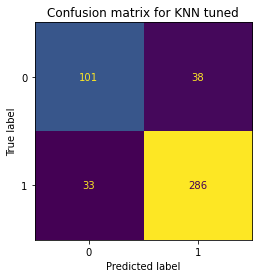

In [206]:
# Confusion matrix of test data
plot_confusion_matrix(estimator=best_model,X=X_testK,y_true=y_testK,colorbar=False);
plt.title('Confusion matrix for KNN tuned');

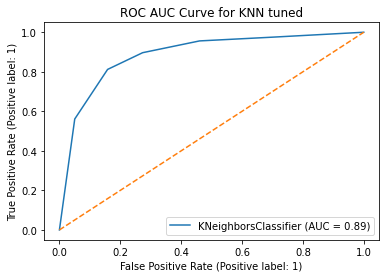

In [207]:
# roc_auc_curve of test data
plot_roc_curve(estimator=best_model,X=X_testK,y=y_testK);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for KNN tuned');

In [208]:
KNNT_recall_1 = round(recall_score(y_testK,KNNT_test_pred),2)
KNNT_recall_0 = round(recall_score(y_testK,KNNT_test_pred,pos_label=0),2)
KNNT_pre_1 = round(precision_score(y_testK,KNNT_test_pred),2)
KNNT_pre_0 = round(precision_score(y_testK,KNNT_test_pred,pos_label=0),2)

### Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
Bagging_model=BaggingClassifier(base_estimator=RF,
                                n_estimators=100,
                                random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [56]:
#training set score
Bagging_model.score(X_train,y_train)

0.971883786316776

In [57]:
#test set score
Bagging_model.score(X_test,y_test)

0.8427947598253275

This is clearly an overfit model which we can't use for production. We can try tuning the Bagging classifier

### Bagging using GridSearch CV

In [213]:
grid = {"base_estimator__max_depth": [3,6,10,15],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [3, 5, 7, 10,15,20],
          "base_estimator__min_samples_split": [10, 15, 20, 30, 45,60],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

In [214]:
gridsearch = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=1)), grid, cv=5, verbose=1,n_jobs=-1)

In [215]:
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1)),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [3, 6, 10, 15],
                         'base_estimator__max_features': [None, 'auto'],
                         'base_estimator__min_samples_leaf': [3, 5, 7, 10, 15,
                                                              20],
                         'base_estimator__min_samples_split': [10, 15, 20, 30,
                                                               45, 60],
                         'bootstrap_features': [False, True],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             verbose=1)

In [216]:
gridsearch.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__max_features': 'auto',
 'base_estimator__min_samples_leaf': 7,
 'base_estimator__min_samples_split': 20,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 20}

In [217]:
best_model = gridsearch.best_estimator_

In [218]:
best_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        max_features='auto',
                                                        min_samples_leaf=7,
                                                        min_samples_split=20,
                                                        random_state=1),
                  n_estimators=20)

In [219]:
#training set score
best_model.score(X_train,y_train)

0.8622305529522024

In [220]:
#test set score
best_model.score(X_test,y_test)

0.8602620087336245

In [221]:
BAGT_train_pred = best_model.predict(X_train)
BAGT_test_pred = best_model.predict(X_test)

In [222]:
#classification report of training set
print(classification_report(y_train,BAGT_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       323
           1       0.88      0.94      0.90       744

    accuracy                           0.86      1067
   macro avg       0.85      0.81      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [223]:
#classification report of test set
print(classification_report(y_test,BAGT_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       139
           1       0.88      0.93      0.90       319

    accuracy                           0.86       458
   macro avg       0.85      0.81      0.83       458
weighted avg       0.86      0.86      0.86       458



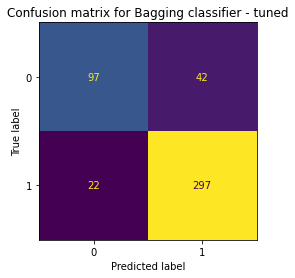

In [224]:
#confusion matrix of test set
plot_confusion_matrix(estimator=best_model,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Bagging classifier - tuned');

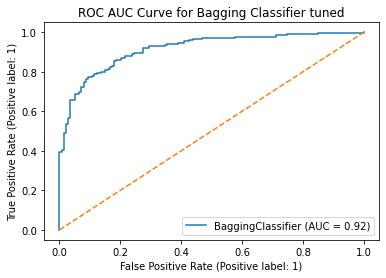

In [225]:
# roc_auc_curve of test data
plot_roc_curve(estimator=best_model,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Bagging Classifier tuned');

In [226]:
BAGT_recall_1 = round(recall_score(y_test,BAGT_test_pred),2)
BAGT_recall_0 = round(recall_score(y_test,BAGT_test_pred,pos_label=0),2)
BAGT_pre_1 = round(precision_score(y_test,BAGT_test_pred),2)
BAGT_pre_0 = round(precision_score(y_test,BAGT_test_pred,pos_label=0),2)

### Boosting

### Ada Boost

In [229]:
from sklearn.ensemble import AdaBoostClassifier

In [230]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [231]:
#training set score
ADB_model.score(X_train,y_train)

0.8444236176194939

In [232]:
#test set score
ADB_model.score(X_test,y_test)

0.8362445414847162

In [233]:
ADB_train_pred = ADB_model.predict(X_train)
ADB_test_pred = ADB_model.predict(X_test)

In [234]:
#classification report of training set
print(classification_report(y_train,ADB_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [235]:
#classification report of test set
print(classification_report(y_test,ADB_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



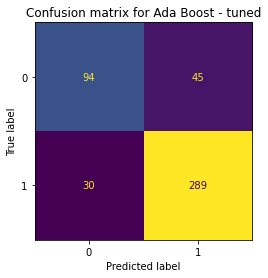

In [236]:
#confusion matrix of test set
plot_confusion_matrix(estimator=ADB_model,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Ada Boost - tuned');

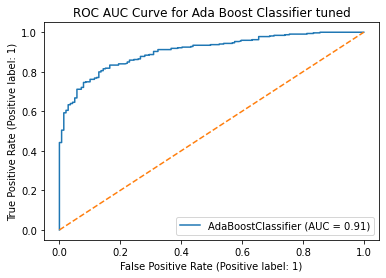

In [237]:
# roc_auc_curve of test data
plot_roc_curve(estimator=ADB_model,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Ada Boost Classifier tuned');

In [238]:
ADB_recall_1 = round(recall_score(y_test,ADB_test_pred),2)
ADB_recall_0 = round(recall_score(y_test,ADB_test_pred,pos_label=0),2)
ADB_pre_1 = round(precision_score(y_test,ADB_test_pred),2)
ADB_pre_0 = round(precision_score(y_test,ADB_test_pred,pos_label=0),2)

In [239]:
pd.DataFrame(ADB_model.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
age,0.69
Europe,0.08
Hague,0.06
economic_cond_national,0.05
Blair,0.05
economic_cond_household,0.04
political_knowledge,0.02
gender,0.01


### Gradient Boost

In [240]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=1)

In [241]:
gbc = gbc.fit(X_train, y_train)

In [242]:
#training set score
gbc.score(X_train,y_train)

0.887535145267104

In [243]:
#test set score
gbc.score(X_test,y_test)

0.8384279475982532

In [244]:
GB_train_pred = gbc.predict(X_train)
GB_test_pred = gbc.predict(X_test)

In [245]:
#classification report of training set
print(classification_report(y_train,GB_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       323
           1       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067



In [246]:
#classification report of test set
print(classification_report(y_test,GB_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



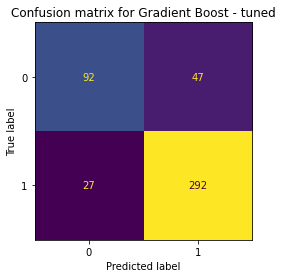

In [247]:
#confusion matrix of test set
plot_confusion_matrix(estimator=gbc,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Gradient Boost - tuned');

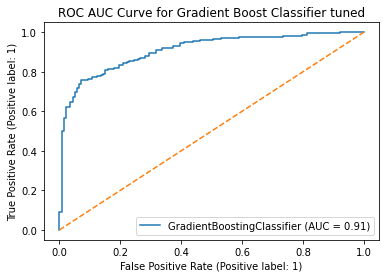

In [248]:
# roc_auc_curve of test data
plot_roc_curve(estimator=gbc,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Gradient Boost Classifier tuned');

In [249]:
GB_recall_1 = round(recall_score(y_test,GB_test_pred),2)
GB_recall_0 = round(recall_score(y_test,GB_test_pred,pos_label=0),2)
GB_pre_1 = round(precision_score(y_test,GB_test_pred),2)
GB_pre_0 = round(precision_score(y_test,GB_test_pred,pos_label=0),2)

In [250]:
pd.DataFrame(gbc.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Hague,0.379666
Blair,0.168566
Europe,0.153695
political_knowledge,0.122393
age,0.107206
economic_cond_national,0.045879
economic_cond_household,0.018766
gender,0.003828


### Ada Boost hyperparameter tuning

In [251]:
abc_tuned = AdaBoostClassifier(random_state=1)

In [252]:
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=6)],
    "n_estimators": np.arange(1,301,50),
    "learning_rate":np.arange(0.1,2,0.1)
}

In [253]:
grid_obj = GridSearchCV(abc_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

In [254]:
grid_obj.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.1,
 'n_estimators': 51}

In [255]:
best_model = grid_obj.best_estimator_

In [256]:
best_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=51, random_state=1)

In [257]:
#training score
best_model.score(X_train,y_train)

0.8266166822867854

In [258]:
#test score
best_model.score(X_test,y_test)

0.8253275109170306

In [259]:
ABT_train_pred = best_model.predict(X_train)
ABT_test_pred = best_model.predict(X_test)

In [260]:
#classification report of training set
print(classification_report(y_train,ABT_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       323
           1       0.84      0.93      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.76      0.78      1067
weighted avg       0.82      0.83      0.82      1067



In [261]:
#classification report of test set
print(classification_report(y_test,ABT_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66       139
           1       0.83      0.94      0.88       319

    accuracy                           0.83       458
   macro avg       0.82      0.75      0.77       458
weighted avg       0.82      0.83      0.82       458



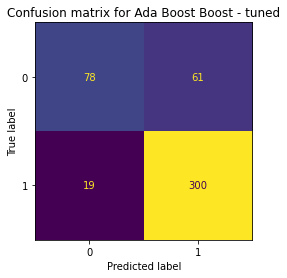

In [262]:
#confusion matrix of test set
plot_confusion_matrix(estimator=best_model,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Ada Boost Boost - tuned');

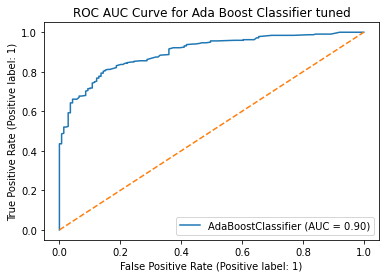

In [263]:
# roc_auc_curve of test data
plot_roc_curve(estimator=best_model,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Ada Boost Classifier tuned');

In [264]:
ABT_recall_1 = round(recall_score(y_test,ABT_test_pred),2)
ABT_recall_0 = round(recall_score(y_test,ABT_test_pred,pos_label=0),2)
ABT_pre_1 = round(precision_score(y_test,ABT_test_pred),2)
ABT_pre_0 = round(precision_score(y_test,ABT_test_pred,pos_label=0),2)

In [265]:
pd.DataFrame(best_model.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Blair,0.294118
Hague,0.294118
Europe,0.215686
age,0.078431
economic_cond_national,0.078431
political_knowledge,0.039216
economic_cond_household,0.000000
gender,0.000000


### GradientBoost using hyperparameter tuning

In [266]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

In [267]:
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

In [268]:
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

In [269]:
grid_obj.best_params_

{'max_features': 0.7, 'n_estimators': 100, 'subsample': 0.8}

In [270]:
gbc_tuned = grid_obj.best_estimator_

In [271]:
#ytraining score
gbc_tuned.score(X_train,y_train)

0.8912839737582006

In [272]:
#ytraining score
gbc_tuned.score(X_test,y_test)

0.834061135371179

In [273]:
GBT_train_pred = gbc_tuned.predict(X_train)
GBT_test_pred = gbc_tuned.predict(X_test)

In [274]:
#classification report of training set
print(classification_report(y_train,GBT_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       323
           1       0.91      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [275]:
#classification report of test set
print(classification_report(y_test,GBT_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       139
           1       0.86      0.92      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



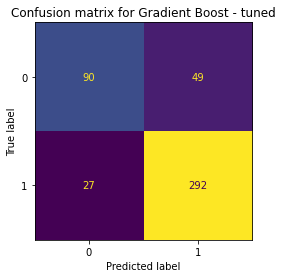

In [276]:
#confusion matrix of test set
plot_confusion_matrix(estimator=gbc_tuned,X=X_test,y_true=y_test,colorbar=False);
plt.title('Confusion matrix for Gradient Boost - tuned');

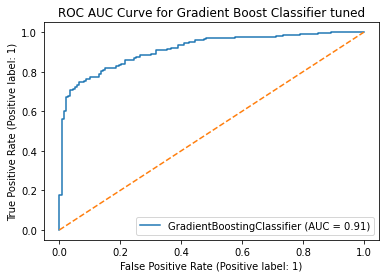

In [277]:
# roc_auc_curve of test data
plot_roc_curve(estimator=gbc_tuned,X=X_test,y=y_test);
plt.plot([0,1],[0,1],linestyle='--');
plt.title('ROC AUC Curve for Gradient Boost Classifier tuned');

In [278]:
GBT_recall_1 = round(recall_score(y_test,GBT_test_pred),2)
GBT_recall_0 = round(recall_score(y_test,GBT_test_pred,pos_label=0),2)
GBT_pre_1 = round(precision_score(y_test,GBT_test_pred),2)
GBT_pre_0 = round(precision_score(y_test,GBT_test_pred,pos_label=0),2)

In [279]:
pd.DataFrame(gbc_tuned.feature_importances_, 
             columns = ["Imp"], 
             index = X_train.columns).sort_values('Imp',ascending=False)

,Imp
Hague,0.271625
Europe,0.220480
Blair,0.188422
age,0.118657
political_knowledge,0.104652
economic_cond_national,0.062864
economic_cond_household,0.025824
gender,0.007478


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [280]:
model_names = ['LogisticRegression',
               'LDA',
               'NaiveBayes',
               'KNN',
               'LogisticRegression-Tuned',
               'RandomForest-Tuned',
               'LDA-Tuned',
               'KNN-Tuned',
               'Bagging-Tuned',
               'AdaBoost',
               'GradientBoost',
              'AdaBoost-Tuned',
              'GradientBoost-Tuned']

train_accuracy = [0.83,
0.83,
0.82,
0.84,
0.83,
0.87,
0.83,
0.86,
0.9,
0.84,
0.89,
0.83,
0.89]
test_accuracy = [0.85,
0.85,
0.85,
0.86,
0.86,
0.85,
0.85,
0.84,
0.86,
0.84,
0.84,
0.83,
0.83]

test_AUC = [0.91,
0.91,
0.91,
0.89,
0.92,
0.91,
0.92,
0.89,
0.92,
0.91,
0.91,
0.9,
0.91]
metrics_df = pd.DataFrame({'train_accuracy':train_accuracy,
                         'test_accuracy':test_accuracy,
                           'test_AUC':test_AUC},
                        index=model_names)
metrics_df

,train_accuracy,test_accuracy,test_AUC
LogisticRegression,0.83,0.85,0.91
LDA,0.83,0.85,0.91
NaiveBayes,0.82,0.85,0.91
KNN,0.84,0.86,0.89
LogisticRegression-Tuned,0.83,0.86,0.92
RandomForest-Tuned,0.87,0.85,0.91
LDA-Tuned,0.83,0.85,0.92
KNN-Tuned,0.86,0.84,0.89
Bagging-Tuned,0.90,0.86,0.92
AdaBoost,0.84,0.84,0.91


In [281]:
metrics_df['test_recall_Class1'] = [Log_recall_1,LDA_recall_1,NB_recall_1,KNN_recall_1,LRT_recall_1,RF_recall_1,LDAT_recall_1,KNNT_recall_1,BAGT_recall_1,ADB_recall_1,GB_recall_1,ABT_recall_1,GBT_recall_1]
metrics_df['test_recall_Class0'] = [Log_recall_0,LDA_recall_0,NB_recall_0,KNN_recall_0,LRT_recall_0,RF_recall_0,LDAT_recall_0,KNNT_recall_0,BAGT_recall_0,ADB_recall_0,GB_recall_0,ABT_recall_0,GBT_recall_0]
metrics_df['test_precision_Class1'] = [Log_pre_1,LDA_pre_1,NB_pre_1,KNN_pre_1,LRT_pre_1,RF_pre_1,LDAT_pre_1,KNNT_pre_1,BAGT_pre_1,ADB_pre_1,GB_pre_1,ABT_pre_1,GBT_pre_1]
metrics_df['test_precision_Class0'] = [Log_pre_0,LDA_pre_0,NB_pre_0,KNN_pre_0,LRT_pre_0,RF_pre_0,LDAT_pre_0,KNNT_pre_0,BAGT_pre_0,ADB_pre_0,GB_pre_0,ABT_pre_0,GBT_pre_0]
metrics_df

,train_accuracy,test_accuracy,test_AUC,test_recall_Class1,test_recall_Class0,test_precision_Class1,test_precision_Class0
LogisticRegression,0.83,0.85,0.91,0.92,0.68,0.87,0.80
LDA,0.83,0.85,0.91,0.92,0.68,0.87,0.80
NaiveBayes,0.82,0.85,0.91,0.90,0.73,0.88,0.76
KNN,0.84,0.86,0.89,0.92,0.73,0.89,0.80
LogisticRegression-Tuned,0.83,0.86,0.92,0.93,0.68,0.87,0.81
RandomForest-Tuned,0.87,0.85,0.91,0.92,0.69,0.87,0.78
LDA-Tuned,0.83,0.85,0.92,0.91,0.72,0.88,0.78
KNN-Tuned,0.86,0.84,0.89,0.90,0.73,0.88,0.75
Bagging-Tuned,0.90,0.86,0.92,0.93,0.70,0.88,0.82
AdaBoost,0.84,0.84,0.91,0.91,0.68,0.87,0.76


# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [434]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [435]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
print(f'Number of words in Roosevelt speech is: {len(Roosevelt_words)}')

Number of words in Roosevelt speech is: 1536


In [436]:
Roosevelt_sents = inaugural.sents('1941-Roosevelt.txt')
print(f'Number of sentences in Roosevelt speech is: {len(Roosevelt_sents)}')

Number of sentences in Roosevelt speech is: 68


In [437]:
Roosevelt_char = inaugural.raw('1941-Roosevelt.txt')
print(f'Number of characters in Roosevelt speech is: {len(Roosevelt_char)}')

Number of characters in Roosevelt speech is: 7571


In [438]:
Kennedy_words = inaugural.words('1961-Kennedy.txt')
print(f'Number of words in Kennedy speech is: {len(Kennedy_words)}')

Number of words in Kennedy speech is: 1546


In [439]:
Kennedy_sents = inaugural.sents('1961-Kennedy.txt')
print(f'Number of sentences in Kennedy speech is: {len(Kennedy_sents)}')

Number of sentences in Kennedy speech is: 52


In [440]:
Kennedy_char = inaugural.raw('1961-Kennedy.txt')
print(f'Number of characters in Kennedy speech is: {len(Kennedy_char)}')

Number of characters in Kennedy speech is: 7618


In [441]:
Nixon_words = inaugural.words('1973-Nixon.txt')
print(f'Number of words in Nixon speech is: {len(Nixon_words)}')

Number of words in Nixon speech is: 2028


In [442]:
Nixon_sents = inaugural.sents('1973-Nixon.txt')
print(f'Number of sentences in Nixon speech is: {len(Nixon_sents)}')

Number of sentences in Nixon speech is: 69


In [443]:
Nixon_char = inaugural.raw('1973-Nixon.txt')
print(f'Number of characters in Nixon speech is: {len(Nixon_char)}')

Number of characters in Nixon speech is: 9991


## 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [444]:
speech_list = [inaugural.raw('1941-Roosevelt.txt'),inaugural.raw('1961-Kennedy.txt'),inaugural.raw('1973-Nixon.txt')]

In [445]:
df = pd.DataFrame(speech_list, columns=['text'])
df

,text
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [446]:
def count_word(sentence):
    words = sentence.split()
    return len(words)

df['word_count'] = df['text'].apply(lambda x: count_word(x))
df.head()

,text,word_count
0,On each national day of inauguration since 178...,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [447]:
## Converting all the words to lower case

df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,text,word_count
0,on each national day of inauguration since 178...,1360
1,"vice president johnson, mr. speaker, mr. chief...",1390
2,"mr. vice president, mr. speaker, mr. chief jus...",1819


### Removal of stop words

In [448]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,word_count
0,"national day inauguration since 1789, people r...",1360
1,"vice president johnson, mr. speaker, mr. chief...",1390
2,"mr. vice president, mr. speaker, mr. chief jus...",1819


In [449]:
df['new_word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,text,word_count,new_word_count
0,"national day inauguration since 1789, people r...",1360,666
1,"vice president johnson, mr. speaker, mr. chief...",1390,730
2,"mr. vice president, mr. speaker, mr. chief jus...",1819,861


In [450]:
df['text'][0]

'national day inauguration since 1789, people renewed sense dedication united states. washington\'s day task people create weld together nation. lincoln\'s day task people preserve nation disruption within. day task people save nation institutions disruption without. us come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. not, risk real peril inaction. lives nations determined count years, lifetime human spirit. life man three-score years ten: little more, little less. life nation fullness measure live. men doubt this. men believe democracy, form government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide. americans know true. eight years ago, life republic seemed frozen fatalistic terror, proved true. midst shock -- acted. acted quickly, boldly, decisively. later years living years -- fruitful years people democracy. brought us gr

In [451]:
#Removal of all non-alphanumric and non-space
df['text'] = df['text'].str.replace('[^\w\s]','')
df

,text,word_count,new_word_count
0,national day inauguration since 1789 people re...,1360,666
1,vice president johnson mr speaker mr chief jus...,1390,730
2,mr vice president mr speaker mr chief justice ...,1819,861


In [452]:
df['text'][0]

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock  recall place history been rediscover may be not risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little more little less life nation fullness measure live men doubt this men believe democracy form government frame life limited measured kind mystical artificial fate that unexplained reason tyranny slavery become surging wave future  freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock  acted acted quickly boldly decisively later years living years  fruitful years people democracy brought us greater security and hope better understanding 

### Common Words Removal

We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.

In [453]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

us            46
let           39
world         27
new           26
peace         23
america       22
nation        21
nations       15
freedom       14
government    14
dtype: int64

In [454]:
# creating a list of top words that we will NOT consider
#removing word like mr
freq =['us','let','mr']

In [455]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson speaker chief justice p...
2    vice president speaker chief justice senator c...
Name: text, dtype: object

### Rare Words Removal
This is done as association of these less occurring words with the existing words could be a noise

In [456]:
freq = pd.Series(' '.join(df['text']).split()).value_counts().tail(10)
freq

grow        1
function    1
prophecy    1
cost        1
wealth      1
battle      1
instruct    1
pattern     1
lose        1
resist      1
dtype: int64

As it is difficult to make out if these words will have association in text analytics or not, hence we will keep these words.

### Stemming

Refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [457]:
from nltk.stem import PorterStemmer #snowball stemmer
st = PorterStemmer()

In [458]:
df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson speaker chief justic presi...
2    vice presid speaker chief justic senat cook mr...
Name: text, dtype: object

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [465]:
freq1 = pd.Series(df['text'][0].split()).value_counts()[:3]
freq1

nation    11
know      10
spirit     9
dtype: int64

In [460]:
freq2 = pd.Series(df['text'][1].split()).value_counts()[:3]
freq2

sides     8
world     8
pledge    7
dtype: int64

In [461]:
freq3 = pd.Series(df['text'][2].split()).value_counts()[:3]
freq3

peace    19
world    16
new      15
dtype: int64

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

Word Cloud for first speech!!


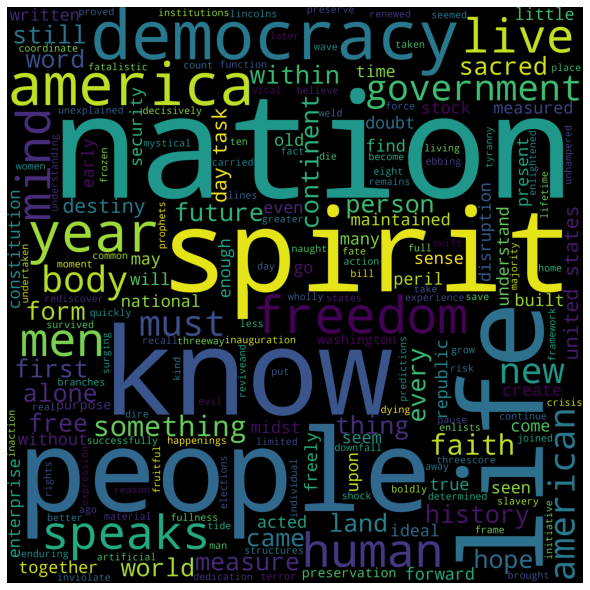

In [462]:
# Word Cloud 
from wordcloud import WordCloud
# wordcloud = WordCloud().generate(wc_a) if ok with default wordcloud parameters

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df['text'][0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for first speech!!")

Word Cloud for second speech!!


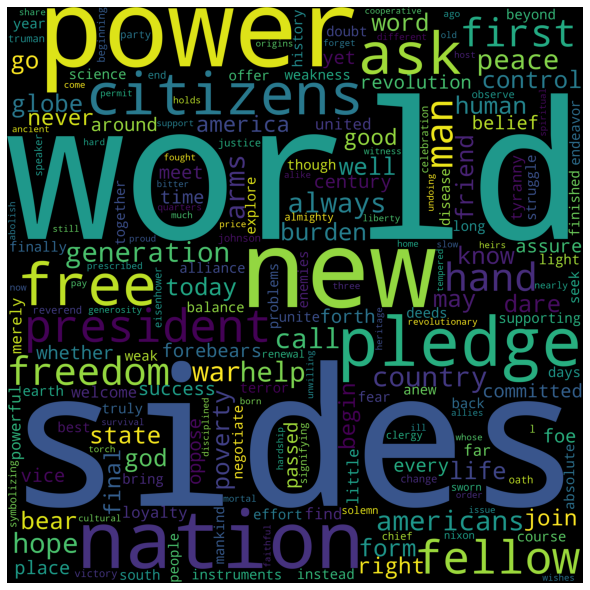

In [466]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df['text'][1]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for second speech!!")

Word Cloud for third speech!!


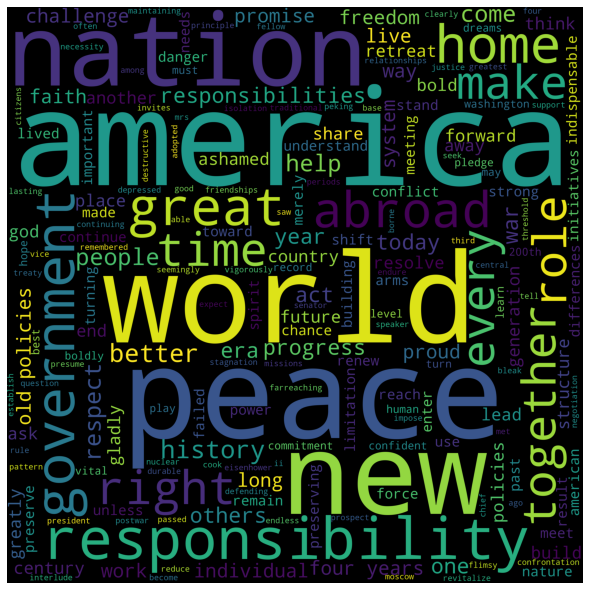

In [467]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(df['text'][2]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for third speech!!")